# 지도학습(Supervised Machinelearning)
## 1. Linear Regression
- $ \hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p $
- $ w = (w_1,..., w_p) $
- $ min_{w} || X w - y||_2^2 $
- w = coef_ , b = intercept_
- 모델의 평가 항목
    - R<sup>2</sup>
        - R-squared는 우리말로는 결정계수라고 하며, R<sup>2</sup>으로도 표현된다.용처는 회귀모형의 설명력을 표현하는 것. P-value와 같이 0과 1 사이의 값으로 나타나는데, 0에 가까울수록 설명력이 낮고, 1에 가까울수록 높다고 해석할 수 있다.
        - $R^2 = {SSE \over SST} = 1 - {SSR \over SST}$
            - SST(Total Sum of Squares)
                - $SST = \sum {(y - \bar y)}^2$
            - SSE(Explained Sum of Squares)
                - $SSE = \sum {(\hat y - \bar y)}^2$
            - SSR(Residual Sum of Squares)
                - $SSR = \sum {(y - \hat y)}^2$
    - 수정된 결정계수(Adjusted $R^2$) 
        - k개의 독립변수들 중 p개를 선택하여 종속변수(y)의 변화량을 설명하고자 할 때, 결정계수를 크게 해주는 p개의 변수들을 선택하는 것이 당연하다. 
        - 결정계수는 SST중에서 회귀직선에 의해 설명되는 SSR의 비율을 의미하므로 변동이 클수록 좋다. 
        - 하지만 다중 회귀분석의 경우 결정계수는 p가 증가혀면, 독립벼눗의 수가 증가하며서 커지는 증가함수 이므로 도립변수가 유의하든 안하든 그 개수가 증가하면 결정계수는 커지는 단점을 가지고 있다.
        - 수정된 결정계수는 결정계수의 이런 단점을 보완하기 위해 사용된다.
        - 데이터의 갯수가 n 이고 독립변수의 갯수가 p일 경우 수정된 결정계수의 식은 다음과 같다.
         $ adjusted R^2 = 1 - {(n-1)(1-R^2)\over (n-p-1)} $
    - RMSE(Root Mean Square Error) 
        - 평균 제곱근 편차(Root Mean Square Deviation; RMSD) 또는 평균 제곱근 오차(Root Mean Square Error; RMSE)는 추정 값 또는 모델이 예측한 값과 실제 환경에서 관찰되는 값의 차이를 다룰 때 흔히 사용하는 측도이다.
        - $RMSE =\sqrt {\sum{(y - \hat y)}^2 \over N} $

In [2]:
## 1. 필요 모듈 임포트
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [15]:
## 1. 필요 모듈 임포트
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [12]:
## 2. 데이터 준비
X = np.arange(1,10)
noise = np.random.randn(9)
y = X * 2 + noise
X = X.reshape(9,1)

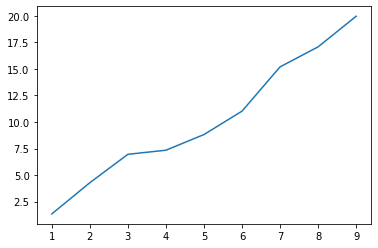

In [7]:
## 2.1 데이터 정제 데이터의 탐색적분석
plt.plot(X,y)

In [11]:
y.shape

(9,)

In [13]:
## 3. 모델생성 및 학습
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
## 4. 모델 평가
y_hat = lm.predict(X)
rmse = np.sqrt(mse(y,y_hat))
r2 = r2_score(y,y_hat)
print(rmse)
print(r2)

0.8847641597819165
0.9709901253315393


In [23]:
lm.predict([[100]])

array([198.60200742])

In [27]:
lm.intercept_

0.3545474215347273

In [41]:
ws = np.linspace(-100,100,8000)
cost = []
for w in ws:
    y_hat = X*w
    cost.append(((y - y_hat)**2).mean())

In [44]:
#1~10
s = 0
for i in range(1,11):
    s += i
s

55

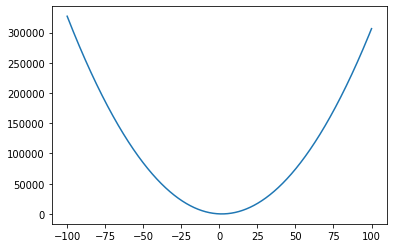

In [42]:
plt.plot(ws,cost)

In [439]:
X = np.arange(100)
y = X * 121

In [440]:
w = np.random.uniform(-1,1)
lr = 0.00001
epochs = 10000
for epoch in np.arange(epochs):
    y_hat = X*w
    a = ((y_hat - y)*X).mean()
    w = w-lr*a
    w

In [443]:
## 1. 필요모듈 임포트
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [602]:
## 2. 데이터 준비
x1 = np.random.randn(100)
x2 = np.random.randn(100)
y = x1*6 + x2*121
df = pd.DataFrame(x1)
df.columns = ['x1']
df['x2'] = x2
df['y'] = y

In [603]:
## 2.1 데이터 정리 및 정제
# 종속변수 독립변수
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [560]:
## 3. 모델생성 및 학습
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [583]:
## 4. 모델평가
result = lm.predict(X)
rmse = mse(y,result) 
r2 = r2_score(y,result)
print(rmse)
print(r2)
print(lm.coef_)

1.3611077857351664e-27
1.0
[  6. 121.]


In [601]:
x_1 = X.x1.values.reshape(-1,1)
x_2 = X.x2.values.reshape(-1,1)

w1 = np.random.uniform(-2,2)
w2 = np.random.uniform(-2,2)

y = y.values.reshape(-1,1)

In [588]:
lr = 0.00001
w1 = np.random.uniform(-1,1)
w2 = np.random.uniform(-1,1)
epochs = 300000
print(w1,w2)
for epoch in np.arange(epochs):
    y_hat1 = x_1 * w1
    y_hat2 = x_2 * w2
    y_hat = y_hat1 + y_hat2
    a1 = ((y_hat - y)*x_1).mean()
    a2 = ((y_hat - y)*x_2).mean()
    w1 = w1 - lr*a1
    w2 = w2 - lr*a2
print(w1,w2)

-0.036698762284534725 -0.41913163113227503
6.666596454412101 118.91829967248736


In [463]:
## 5. 모델사용
lm.predict([[10,1]])

array([181.])

In [3]:
## 2. 데이터 준비
from sklearn.model_selection import train_test_split
X = [[0, 0], [1, 1], [2, 2]]
y = [0,1,2]

In [4]:
## 3. 모델 생성
reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

[0.5 0.5]
2.220446049250313e-16


In [5]:
## 4. 모델 성능평가
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
y_hat = reg.predict(X) ## 예측값

rmse = mean_squared_error(y_hat,y)
print(rmse)
r2 = r2_score(y_hat,y)
print(r2)

3.2869204384208823e-32
1.0


In [6]:
## 5. 모델 사용
reg.predict([[0,3]])

array([1.5])

In [605]:
y

0     -19.202071
1    -138.306024
2       9.089026
3     261.880220
4     -76.226942
         ...    
95   -198.589325
96     30.930864
97    -30.314411
98   -137.934959
99     48.875508
Name: y, Length: 100, dtype: float64

In [606]:
w = np.random.random(2)
w

array([0.81697616, 0.16894679])

In [608]:
## 2. 데이터 준비
x1 = np.random.randn(100)
x2 = np.random.randn(100)
y = x1*6 + x2*121
df = pd.DataFrame(x1)
df.columns = ['x1']
df['x2'] = x2
df['y'] = y

In [619]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_1 = X.x1.values.reshape(-1,1)
x_2 = X.x2.values.reshape(-1,1)
w1 = np.random.uniform(-1,1)
w2 = np.random.uniform(-1,1)

In [643]:
w = np.random.randn(2,1)
X = X.values.reshape(100,2)
y = y.values.reshape(100,1)
lr = 0.0001
epochs = 300000
for epoch in np.arange(epochs):
    

In [649]:
y_hat = np.dot(X,w)
print((y_hat - y).shape)
print(X.shape)

(100, 1)
(100, 2)


In [656]:
print(np.dot(X.T,y_hat))

[[ 30.02234667]
 [-61.59369783]]


In [629]:
w = np.array([w1,w2])
y_hat_ar = np.dot(X.values,w)

In [636]:
y_hat_ar = y_hat_ar.reshape(100,1)

In [694]:
## 2. 데이터 준비
x1 = np.random.randn(100)
x2 = np.random.randn(100)
y = x1*6 + x2*121
df = pd.DataFrame(x1)
df.columns = ['x1']
df['x2'] = x2
df['y'] = y

In [695]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [696]:
X = X.values.reshape(100,2)
y = y.values.reshape(100,1)

In [699]:
## dot 연산 X:(100,2) w:(2,1) = y_hat:(100,1) 예측값과 실제값의 shape을 맞춤
w = np.random.randn(2)
w = w.reshape(2,1)
y_hat = np.dot(X,w)
## X:(100,2) y_hat:(100,1)
## (2,100) (100,1),  (1,100)(100,2)
## np.dot(X.T,y_hat) np.dot(y_hat.T,X)

(100, 1)

In [ ]:
w = np.random.randn(2)
w = w.reshape(2,1)
epochs = 300000
for epoch in np.arange(epochs):
    y_hat = np.dot(X,w)
    a = np.dot()

In [702]:
y.flatten().size

100

In [703]:
lr = 0.00001
w = np.random.randn(2)
w = w.reshape(2,1)
epochs = 1000000
for epoch in np.arange(epochs):
    y_hat = np.dot(X,w)
    a = np.dot(X.T,(y_hat-y))/y.flatten().size
    w = w - lr*a

In [706]:
## Diabetes 데이터셋 으로 테스트 
## 1. 필요 모듈 임포트
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes

In [739]:
##1. 필요 모듈 임포트
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.datasets import load_diabetes

In [741]:
##2. 데이터 셋 준비
data = load_diabetes()
diabetes = data['data']
diabetes = pd.DataFrame(diabetes)
diabetes.columns = data['feature_names']
diabetes['target'] = data['target']
diabetes
diabetes.to_csv('diabetes.csv',index=False)
diabetes = pd.read_csv('diabetes.csv')

In [742]:
## 데이터 확인 전처리 정리
X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]

In [743]:
## 3. 모델생성 및 학습
rf_model = RandomForestRegressor()
rf_model.fit(X,y)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [746]:
y_hat = rf_model.predict(X)
rmse = np.sqrt(mse(y,y_hat))
r2 = r2_score(y,y_hat)
print(rmse)
print(r2)

25.41813004218896
0.89104656395974


In [725]:
shape = (X.shape[1],y.shape[1])
shape

(10, 1)

In [726]:
lr = 0.00001
w = np.random.randn(10)
w = w.reshape(10,1)
epochs = 1000000
for epoch in np.arange(epochs):
    y_hat = np.dot(X,w)
    a = np.dot(X.T,(y_hat-y))/y.flatten().size
    w = w - lr*a

In [745]:
result = np.dot(X,w)
rmse = np.sqrt(mse(y,result))
r2 = r2_score(y,result)
print(rmse)
print(r2)

169.43311526007545
-3.841169946096488


In [711]:
##3. 모델 생성 및 학습
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [744]:
##4. 모델 평가
result = lm.predict(X)
rmse = np.sqrt(mse(y,result))
r2 = r2_score(y,result)
print(rmse)
print(r2)

53.47607314274362
0.5177494254132934


In [98]:
## 2.1 데이터 준비 및 확인
data = load_diabetes()
diabetes = data['data']
diabetes = pd.DataFrame(diabetes)
diabetes.columns = data['feature_names']
diabetes['target'] = data['target']
diabetes
diabetes.to_csv('diabetes.csv',index=False)
diabetes = pd.read_csv('diabetes.csv')

In [99]:
## 2.2 데이터 셋 X(독립변수), y(종속변수) 만들기
print(diabetes.columns) # 변수확인
X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')


In [82]:
# 3.모델 생성
reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
152.1334841628965


In [83]:
## 4. 모델 성능평가
y_predict = reg.predict(X)
rmse = np.sqrt(mean_squared_error(y,y_predict))
r2 = r2_score(y,y_predict)
print(rmse)
print(r2)

53.47607314274362
0.5177494254132934


In [84]:
## 5. 모델 사용
# 각 변수의 평균값을 사용하여 예측
x = np.mean(X.values,axis=0)
print(x.shape)
x = x.reshape(1,-1)
print(x.shape)
reg.predict(x)

(10,)
(1, 10)


array([152.13348416])

In [101]:
## Train과 Test Set을 나누어 모델 검증
## 1. 모듈 임포트
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [134]:
## 2. 데이터 준비
df = pd.read_csv('diabetes.csv')
## 2-1. 독립변수, 종속변수 분리
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
## 2-2 Train Set과 Test Set 분리 (Random 함수 사용)
ind = np.random.choice(y.size,y.size,replace=False)
train_ind = ind[:np.ceil((ind.size)*0.8).astype('int')]
test_ind = ind[np.ceil((ind.size)*0.8).astype('int'):]
Train_x = X.loc[train_ind]
train_y = y.loc[train_ind]
Test_x = X.loc[test_ind]
test_y = y.loc[test_ind]
# Train Set과 Test Set 분리 (싸이킷런 제공 함수 사용)
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2)

In [137]:
## train test split 함수로 만들기
def split_data(x,y,ratio=0.8):
    ind = np.random.choice(y.size,y.size,replace=False)
    train_ind = ind[:np.ceil((ind.size)*ratio).astype('int')]
    test_ind = ind[np.ceil((ind.size)*ratio).astype('int'):]
    Train_x = x.loc[train_ind]
    train_y = y.loc[train_ind]
    Test_x = x.loc[test_ind]
    test_y = y.loc[test_ind]
    return(Train_x,train_y,Test_x,test_y)
tr_x, tr_y, te_x, te_y = split_data(X,y)

In [135]:
## 3. 모델생성
reg1 = LinearRegression()
reg2 = LinearRegression()
reg1.fit(Train_x,train_y)
reg2.fit(X_train,y_train)

LinearRegression()

In [136]:
## 4. 모델 성능평가
y_predict = reg1.predict(Test_x)
rmse = np.sqrt(mean_squared_error(test_y,y_predict))
r2 = r2_score(test_y,y_predict)
print(rmse)
print(r2)
y_predict = reg2.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_predict))
r2 = r2_score(y_test,y_predict)
print(rmse)
print(r2)

55.82030885052141
0.4750709111397625
52.85384647435579
0.47314646617768874


## Overfitting Underfitting
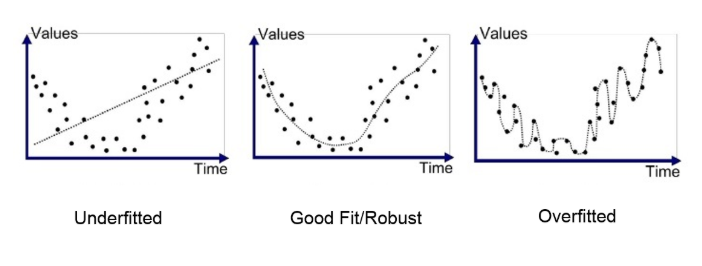

- 첫번째 그림을 보면 직선 방정식을 이용하여 선을 그었다(데이터와 직선의 차이가 큼) 이런 경우를 underfitted 또는 high bias 라고 한다. bias가 큰 모델은 test data를 위한 학습이 덜 된 것이 원인이고, 이는 train data와 test data간의 차이가 너무 커서 train data로만 학습한 모델은 test data를 맞출수가 없는 것이다.세번째 그림을 보면 현재 데이터로는 잘 맞겠지만 다른 데이터를 사용한다면 정확한 예측을 하지 못한다. 이런 경우는 overfitting 또는 high variance 라고 한다. variance가 큰 모델은 train data에 over-fitting된 것이 원인이고, 이는 너무 train data에 fitting된 모델을 만들어서 test data에서 오차가 발생한 것을 의미한다.
- 두번째 그림이 가장 좋은 모델이라고 말할 수 있다. 어느정도 데이터에 적합하면서 bias와 variance에 대해서도 적절하기 때문이다.
- 모델을 만들 때, bias와 variance를 둘 다 줄여주면 제일 좋겠지만 하나를 포기해야 하는 경우도 발생한다. 이때 bias를 조금 가지더라도 제일 작은 variance를 가지는 모델을 만드는 것을 목적으로 한다. 다시말해 overfitting을 해결함으로써 효과를 보기위해 하는 것이 Ridge와 Lasso 회귀를 하는 목적이다.

## overfitting을 해결하는 방법
- 1. 특성(Feature)의 갯수를 줄여기
    - 주요 특징을 직접 선택하고 나머지는 버린다.
    - Model selection algorithm을 사용한다.
- 2. 정규화(Regularization)를 수행한다
    - 모든 특성을 사용하되, 파라미터(세타)의 값을 줄인다.
    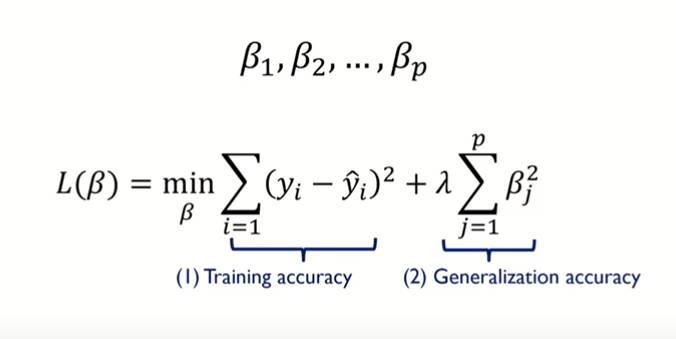
    - 현재 데이터에 대한 예측력도 중요하지만 미래에 예측할 데이터도 중요하기 때문에 일반화가 중요하다. 위의 그림에서 (1)Training accuray만 있으면 최소제곱법과 다른게 없는데 (2)Generalization accuaracy가 추가되면서 베타에 제약을 줄 수 있어 정규화가 가능해지게 된다. 이렇게 계수 추정치를 줄여주는 정규화 방법을 shrinkage method라고 한다.

## 2. Ridge Regression
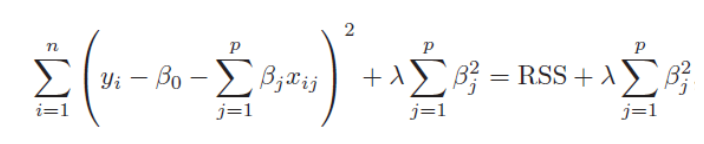
- 릿지 회귀식을 보면 잔자제곱합(RSS : residual sum of squares) + 패널티 항(베타 값)의 합으로 이루어 있음
- 릿지회귀의 패널티항은 파라미터의 제곱을 더해준 것이며  이것은 미분이 가능해 Gradient Descent 최적화가 가능하고, 파라미터의 크기가 작은 것보다 큰 것을 더 빠른 속도로 줄여준다. 
- λ(람다)가 크면 클수록 리지회귀의 계수 추정치는 0에 가까워 진다. 
- (λ = 0 일 때는 패널티 항은 효과가 없고, 따라서 리지 회귀(ridge regression)은 최소제곱추정치를 생성) 즉, λ(람다)가 패널티를 얼마나 부과하는가를 조절하게 된다.

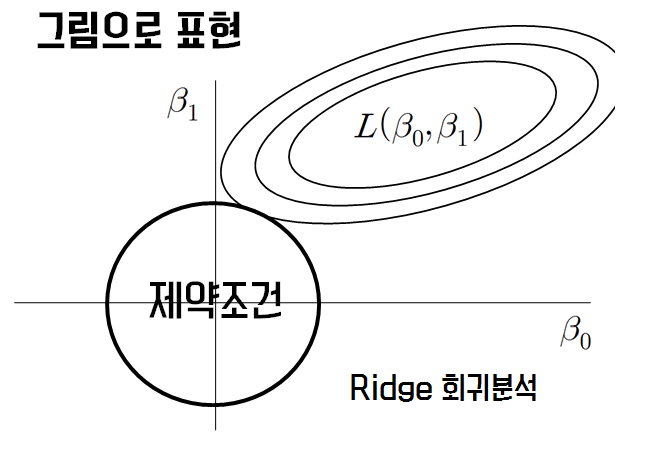
- 위의 그림처럼 릿지회귀의 $ β0^2+β1^2 $ 제약조건인 원이 존재 
- 기존의 OLS(Ordinary Least Squares)가 아래에 보이는 제약조건까지 와야지 최적값이라고 할 수 있음
- 그렇다면 OLS가 제약조건까지 오기 위해서는 RSS(RSS : residual sum of squares) 크기를 키워주게 된다
- bias가 약간의 희생은 하지만 variance를 줄이기 위해서 아래의 그림처럼 제약조건까지 오는 가장 작은 RSS를 추청

In [87]:
## 1. 모듈 임포트
from sklearn.linear_model import Ridge, LinearRegression

In [89]:
## 2. 데이터 준비
X = [[0,0],[0,0],[1,1]]
y = [0,0.1,1]

In [95]:
## 3. 모델생성
##3.1 Linear Regression 모델
reg_linear = LinearRegression()
reg_linear.fit(X,y)
print(reg_linear.coef_)
reg_ridge = Ridge(alpha=0.6)
reg_ridge.fit(X,y)
print(reg_ridge.coef_)

[0.475 0.475]
[0.32758621 0.32758621]


In [96]:
reg_ridge.predict(X)

array([0.14827586, 0.14827586, 0.80344828])

In [97]:
reg_linear.predict(X)

array([0.05, 0.05, 1.  ])

In [141]:
## 1. 모듈 임포트
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [142]:
## 2. 데이터 준비
df = pd.read_csv('diabetes.csv')
# 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [147]:
# X,y 나누기
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
## train set, test set 나누기
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [148]:
## 3. 모델 생성(Linear_Regression)
Linear_model = LinearRegression()
Linear_model.fit(X_train,y_train)

LinearRegression()

In [160]:
## 4. 모델 검증
y_predict = Linear_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_predict))
r2 = r2_score(y_test,y_predict)
print(rmse)
print(r2)
print(Linear_model.coef_)
linear_coef = Linear_model.coef_

56.5074548702286
0.5000392705712455
[   1.86096432 -268.16454408  482.16654468  352.65118494 -751.34744126
  488.04581873   25.31687509   59.63505863  798.9269561    50.43256286]


In [161]:
## 3. 모델 생성(Ridge_Regression)
Ridge_model = Ridge(alpha=0.5)
Ridge_model.fit(X_train,y_train)

Ridge(alpha=0.5)

In [162]:
y_predict = Ridge_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_predict))
r2 = r2_score(y_test,y_predict)
print(rmse)
print(r2)
print(Ridge_model.coef_)
ridge_coef = Ridge_model.coef_

57.82955070378487
0.4763705844704038
[  35.77637619 -119.6004764   350.5666376   244.84633383   -5.15314029
  -54.45361409 -160.14806675  106.31864384  316.64595701   99.87310552]


In [165]:
ridge_coef.std()
linear_coef.std()

415.073229547474

## 3. Lasso Regression
- 라쏘회귀는 릿지회귀와 비슷하게 생겼지만 패널티 항에 절대값의 합을 사용
- 라쏘는 제약조건이 절대값이라 아래의 그림처럼 마름모꼴의 형태로 나타남
- 릿지회귀와 비슷하게 OLS의 RSS 값을 크게 늘려준다. 
- 라쏘회귀의 경우 최적값은 모서리 부분에서 나타날 확률이 릿지에 비해 높아 몇몇 유의미하지 않은 변수들에 대해 계수를 0에 가깝게 추정해 주어 변수 선택 효과를 가져오게 된다.
- 라쏘회귀는 파라미터의 크기에 관계없이 같은 수준의 Regularization을 적용하기 때문에 작은 값의 파라미터를 0으로 만들어 해당 변수를 모델에서 삭제하고 따라서 모델을 단순하게 만들어주고 해석에 용이하게 만들어 준다.

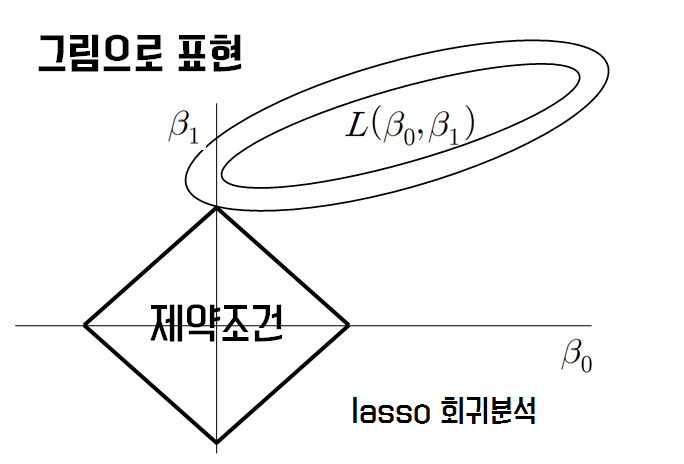

In [166]:
## 1. 모듈 임포트
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [167]:
## 2. 데이터 준비
df = pd.read_csv('diabetes.csv')
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [168]:
## 3. 모델 생성
Lasso_model = Lasso(alpha=0.3)
Lasso_model.fit(X_train,y_train)

Lasso(alpha=0.3)

In [174]:
## 4. 모델 검증
y_predict = Lasso_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_predict,y_test))
r2 = r2_score(y_test,y_predict)
print(rmse)
print(r2)
lasso_coef = Lasso_model.coef_
lasso_coef

57.34750387396977
0.5105094991542006


array([  -0.        ,   -9.98024873,  415.05914707,  195.72595558,
         -0.        ,   -0.        , -162.12909006,    0.        ,
        453.11150217,    0.        ])

## 4. Elastic Net Regression
- L1, L2 norm을 둘 다 사용하여 구성
- Elastic Net Regression은 큰 데이터 셋에서 잘 작동
- $Elastic Net Regression = RSS + \lambda 2 \sum \beta^2 + \lambda 1 \sum \left| \beta \right|  $
- Elastic Net은 L1과 L2 norm에 대한 가중치 $\lambda 1$ 과 $\lambda 2$를 조절하여 사용한다.



In [196]:
## 1. 모듈 임포트
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, ElasticNetCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [190]:
## 2. 데이터 준비
df = pd.read_csv('diabetes.csv')
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [197]:
## 3. 모델 생성
Elastic_model = ElasticNet(alpha=0.3)
Elastic_model.fit(X_train,y_train)

ElasticNet(alpha=0.3)

In [201]:
## 4. 모델 검증
y_predict = Elastic_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_predict,y_test))
r2 = r2_score(y_test,y_predict)
print(rmse)
print(r2)

75.83399710682907
0.03741886263716698


## 5. Polinomial Regression
- Predictor와 response 사이의 관계가 비선형적인 경우 선형 회귀를 연장시키기 위해서는 Polinomial function으로 대체 하는 것이다.





- 이러한 방법을 polynomial regression이라 하고  polynomial regression 또한 여전히 linear regression 이다


In [204]:
## 1. 모듈 임포트
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [227]:
## 2. 데이터 준비
X = np.arange(100)
y = X*X + np.random.randn(1)
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [228]:
## 3. 모델 생성
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [230]:
## 4. 모델 검증
y_predict = reg.predict(X)
rmse = np.sqrt(mean_squared_error(y,y_predict))
r2 = r2_score(y,y_predict)
print(rmse)
print(r2)

745.1696451144531
0.9363356707491832


In [231]:
## 1. 모듈 임포트
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [237]:
## 2. 데이터 준비
X = np.arange(100)
y = X*X + np.random.randn(1)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
# Polinomial로 변환(Python 프로그램을 활용)
x1 = X
x2 = X**2
X = np.concatenate([x1,x2],axis=1)

In [238]:
## 3. 모델 생성
Poly_model = LinearRegression()
Poly_model.fit(X,y)

LinearRegression()

In [239]:
## 4. 모델 검증
y_predict = Poly_model.predict(X)
rmse = np.sqrt(mean_squared_error(y,y_predict))
r2 = r2_score(y,y_predict)
print(rmse)
print(r2)

1.3822486873262066e-12
1.0


In [240]:
## 1. 모듈 임포트
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [243]:
## 2. 데이터 준비
X = np.arange(100)
y = X*X + np.random.randn(1)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
# Polinomial로 변환(Sklearn PolynomialFeatures함수를 활용)
poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(X)

In [244]:
## 3. 모델 생성
Poly_model = LinearRegression()
Poly_model.fit(X,y)

LinearRegression()

In [245]:
## 4. 모델 검증
y_predict = Poly_model.predict(X)
rmse = np.sqrt(mean_squared_error(y,y_predict))
r2 = r2_score(y,y_predict)
print(rmse)
print(r2)

1.8000374603657e-12
1.0


In [ ]:
## 1. 모듈 임포트
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [262]:
## 2. 데이터 준비
df = pd.read_csv('diabetes.csv')
X = df.iloc[:,:-1]
poly = PolynomialFeatures(degree=1)
X = poly.fit_transform(X)
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [263]:
## 3. 모델 생성
Poly_model = LinearRegression()
Poly_model.fit(X_train,y_train)

LinearRegression()

In [264]:
## 4. 모델 검증
y_predict = Poly_model.predict(X)
rmse = np.sqrt(mean_squared_error(y,y_predict))
r2 = r2_score(y,y_predict)
print(rmse)
print(r2)

53.68032240311425
0.5140585250139235


## PipeLine 활용
- PipeLine 사용목적
    - 대부분의 기계 학습 데이터는 최종 모델을 만드는데 있어서 이상적인 형식이 아니기 때문에 범주형 변수를 조작하거나 스케일링 및 정규화와 같은 많은 데이터 변환이 수행되어야 한다.
    - Scikit-Learn은 전처리 기능에 일반적으로 사용되는 대부분의 기능을 내장하고 있다. 
    - 일반적인 기계 학습 워크플로우에서는 이러한 모든 변환을 두 번 이상 적용해야 한다.
    - 모델을 교육할 때 한 번 그리고 예측하고자 하는 모든 새로운 데이터에 대해 다시 한 번하기 때문이다. 
    - 재사용하는 기능을 쓸 수 있지만 먼저 실행하고 나서 모델을 따로 불러야 할 것이다. 
    - Scikit-Learn pipeline은 이 과정을 단순화하는 도구로써 다음과 같은 몇 가지 주요 이점이 있다.
- PipeLine 이점
    - train과 test 데이터 손실을 피할 수 있다.
    - 교차 검증 및 기타 모델 선택 유형을 쉽게 만든다.
    - 재현성 증가

In [275]:
## 1. 모듈 임포트
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [277]:
## PipeLine 설정
model = Pipeline([('poly',PolynomialFeatures(degree=2)),
                ('linear',LinearRegression())])

In [271]:
## 2. 데이터 준비
X = np.arange(100)
y = X*X + np.random.randn(1)
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [274]:
## 3. 모델 생성
model = model.fit(X,y)
model.named_steps['linear'].coef_

array([[0.00000000e+00, 1.24031068e-14, 1.00000000e+00]])